<a href="https://colab.research.google.com/github/teodorachiriac73/PMP-2024/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

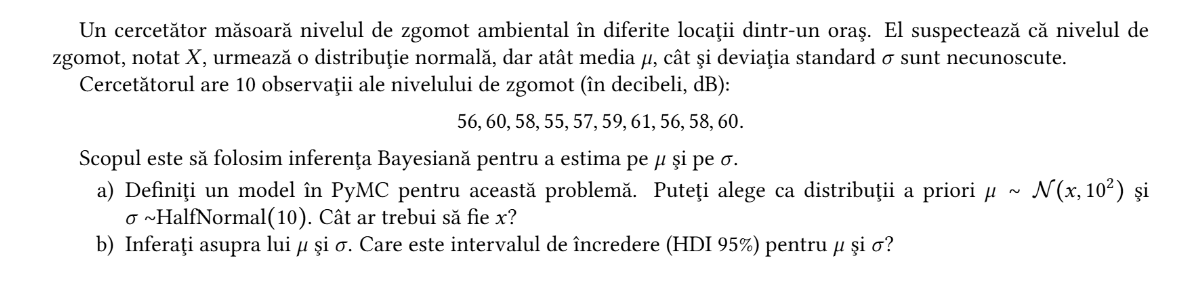

media esantionului  58.0
58.0


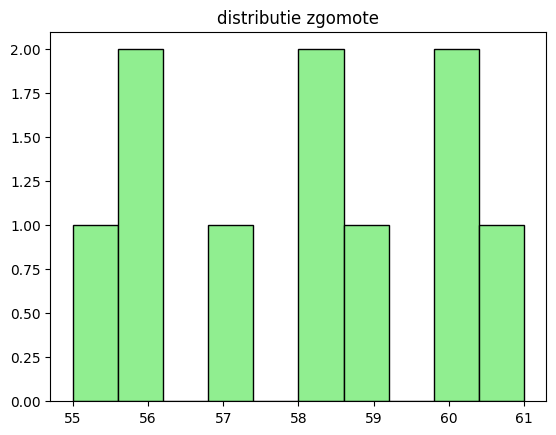

In [20]:
#a
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

observatii = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
print(f"media esantionului ",x)
x = np.mean(observatii)
print(x)
plt.hist(observatii, color='lightgreen', edgecolor='black')
plt.title('distributie zgomote')

plt.show()

with pm.Model() as model:
    # priorii pt mu si sigma
    mu = pm.Normal("mu", mu=x, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    # verosimilitatea informatiilor
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=observatii)




Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.



 rezultat:
         mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     58.013  0.79  56.527   59.432      0.019    0.013    2247.0    1863.0   
sigma   2.336  0.69   1.265    3.533      0.016    0.012    2356.0    2079.0   

       r_hat  
mu       1.0  
sigma    1.0  

distributii posterioare...


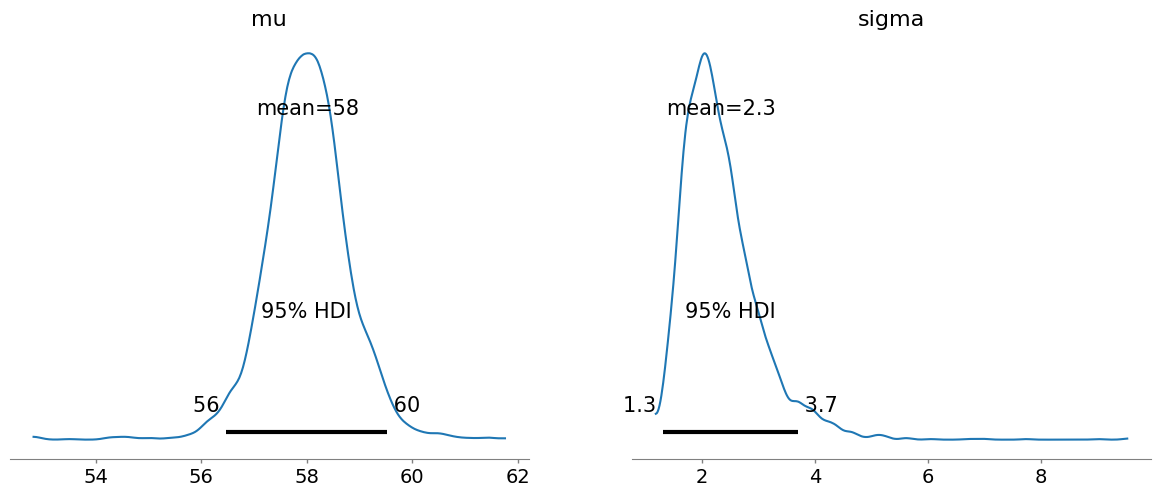

In [17]:
#b
import arviz as az
with model:
    trace = pm.sample(2000, tune=1000,return_inferencedata=True)

hdi_mu = pm.hdi(trace.posterior["mu"], hdi_prob=0.95)
hdi_sigma = pm.hdi(trace.posterior["sigma"], hdi_prob=0.95)

print("\n rezultat:")
summary = az.summary(trace, var_names=['mu', 'sigma'])
print(summary)

print("\ndistributii posterioare...")
az.plot_posterior(trace, var_names=['mu', 'sigma'], hdi_prob=0.95)
plt.show()

In [ ]:
!pip install pymc